In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from Functions import onefig,figtwo,figthree, createdataset1,createdataset11 
from Functions import create_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import TimeDistributed
from autots import AutoTS

tf.config.list_physical_devices('GPU')
tf.random.set_seed(42)

In [6]:
data_path_e = "D:/TIME_SERIES_FORECASTING/input/"

In [7]:
"""     LOAD and PROCESS AAPL1 DATA                                  """

data_AAPL1 = pd.read_csv(data_path_e +'AAPL1.csv')
data_AAPL1['Date'] = pd.to_datetime(data_AAPL1['Date'],infer_datetime_format=True)

print(f"data_AAPL1[:3] : \n {data_AAPL1[:3]} \n")
print(f"data_AAPL1.shape {data_AAPL1.shape} \n")
print(f"data_AAPL1.info()")
data_AAPL1.info()

data_AAPL1[:3] : 
         Date      Open      High       Low   Close  Adj Close     Volume
0 2010-04-01  8.478929  8.526071  8.312500  8.4275   7.183753  603145200
1 2010-04-05  8.392143  8.518214  8.384643  8.5175   7.260470  684507600
2 2010-04-06  8.507143  8.580000  8.464286  8.5550   7.292434  447017200 

data_AAPL1.shape (3197, 7) 

data_AAPL1.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3197 non-null   datetime64[ns]
 1   Open       3197 non-null   float64       
 2   High       3197 non-null   float64       
 3   Low        3197 non-null   float64       
 4   Close      3197 non-null   float64       
 5   Adj Close  3197 non-null   float64       
 6   Volume     3197 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 175.0 KB


In [8]:
data4feat_AAPL1 = data_AAPL1.drop(axis=1, labels=['Adj Close','Volume'])
col_order = ['Date', 'Open','High','Low','Close']
data4feat_AAPL1 = data4feat_AAPL1.reindex(columns=col_order)
print(f"data4feat_AAPL1[:3]: \n {data4feat_AAPL1[:3]} \n")


data4feat_AAPL1[:3]: 
         Date      Open      High       Low   Close
0 2010-04-01  8.478929  8.526071  8.312500  8.4275
1 2010-04-05  8.392143  8.518214  8.384643  8.5175
2 2010-04-06  8.507143  8.580000  8.464286  8.5550 



In [9]:
data_AAPL1x = data4feat_AAPL1.iloc[:,1:]
#data_AAPL1y = data4feat_AAPL1.iloc[:,1:2]

data4feat_AAPL1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3197 non-null   datetime64[ns]
 1   Open    3197 non-null   float64       
 2   High    3197 non-null   float64       
 3   Low     3197 non-null   float64       
 4   Close   3197 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 125.0 KB


In [10]:
"""Parameters"""

  
n_stepsin = 100 # number of steps for train  
n_stepsout = 20 #number of forecasted steps    
rn = 50  #number to choose

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
data_AAPL12.shape (3087, 4) 

data_AAPLf11[:3]: 
         Date      Open      High       Low   Close
0 2010-04-01  8.478929  8.526071  8.312500  8.4275
1 2010-04-05  8.392143  8.518214  8.384643  8.5175
2 2010-04-06  8.507143  8.580000  8.464286  8.5550 



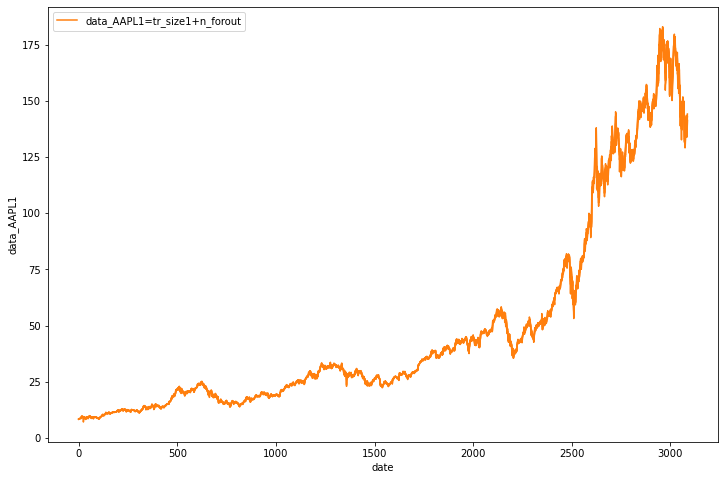

In [11]:
tf.test.is_gpu_available()


"""              Train Test Split                                           """


train_size = int(len(data_AAPL1)) #entire size of data AAPL1
tr_size = int(len(data_AAPL1) * 0.65) # train size of data

#tr_size1 = int(train_size*0.85)  #train and test sizes 
#tr_size1 = int(train_size*0.88)  #train and test sizes 
#tr_size1 = int(train_size*0.80)  #train and test sizes 
tr_size1 = int(train_size*0.95)  #train and test sizes 

data_AAPL12 = data_AAPL1x[0:(tr_size1+rn)] #train size + test size + forecast size
#data_AAPLf1 = data4feat_AAPL1[0:(tr_size1+rn)]
data_AAPLf11 = data4feat_AAPL1[0:(tr_size1)]

print(f"data_AAPL12.shape {data_AAPL12.shape} \n")
print(f"data_AAPLf11[:3]: \n {data_AAPLf11[:3]} \n")

onefig(12,8,data_AAPL12,'date','data_AAPL1','data_AAPL1=tr_size1+n_forout')


In [12]:

"""                             Training                                    """

model = AutoTS(forecast_length=20, frequency='infer', 
               ensemble='simple')

model = model.fit(data_AAPLf11, date_col='Date', value_col='Open', id_col=None)



prediction = model.predict()
forecast = prediction.forecast
forcst = np.array(forecast)
print(f"forcst.shape {forcst.shape} \n")
#print(f"forcst {forcst} \n")

print("Stock Price Prediction of Apple")
print(forecast)


Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model ARIMA in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
138/138 [==============================] - 5s 5ms/step - loss: 0.4110
Epoch 2/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3993
Epoch 3/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3917
Epoch 4/50
138/138 [==============================] - 0s 4ms/step - loss: 0.3906
Epoch 5/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3910
Epoch 6/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3897
Epoch 7/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3886
Epoch 8/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3881
Epoch 9/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3889
Epoch 10/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3878
Epoch 11/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3886
Epoch 12/50
138/138 [=================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\preprocessing\_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 29 with model UnobservedComponents in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model UnobservedComponents in generation 0 of 10
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 33: VAR
Model Number: 34 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 34: VECM
Model Number: 35 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 35: VECM
Model Number: 36 with model WindowRegression in generation 0 of 10
Model Number: 37 with model ConstantNaive in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegression in generation 0 of 10
Model Number: 57 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 10
Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with Value

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 99 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 99: VAR
Model Number: 100 with model GLM in generation 0 of 10
Model Number: 101 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 101: ARCH
Model Number: 102 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 102: VAR
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 104: UnobservedComponents
Model Number: 105 with model ConstantNaive in generation 0 of 10
Model Number: 106 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Model Number: 127 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARIMA
Model Number: 128 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128: VAR
Model Number: 129 with model Theta in generation 0 of 10
Model Number: 130 with model SeasonalNaive in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132: ARCH
Model Number: 133 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one va

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 180 with model UnobservedComponents in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model LastValueNaive in generation 0 of 10
Model Number: 183 with model DatepartRegression in generation 0 of 10
Model Number: 184 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 184: ARIMA
Model Number: 185 with model MultivariateRegression in generation 0 of 10
Model Number: 186 with model AverageValueNaive in generation 0 of 10
Model Number: 187 with model ETS in generation 0 of 10
Model Number: 188 with model ETS in generation 0 of 10
New Generation: 1 of 10
Model Number: 189 with model MultivariateMotif in generation 1 of 10
Model Number: 190 with model MultivariateMotif in generation 1 of 10
Model Number: 191 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_r

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 229 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 230 with model ARIMA in generation 1 of 10
Model Number: 231 with model UnivariateMotif in generation 1 of 10
Model Number: 232 with model NVAR in generation 1 of 10
Model Number: 233 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 233: MultivariateRegression
Model Number: 234 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 235 with model SeasonalNaive in generation 1 of 10
Model Number: 236 with model NVAR in generation 1 of 10


[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 237 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 237: UnivariateRegression
Model Number: 238 with model Theta in generation 1 of 10
Model Number: 239 with model ETS in generation 1 of 10
Model Number: 240 with model MetricMotif in generation 1 of 10
Model Number: 241 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 242 with model ETS in generation 1 of 10
Model Number: 243 with model NVAR in generation 1 of 10
Model Number: 244 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 244: AverageValueNaive
Model Number: 245 with model Theta in generation 1 of 10
Model Number: 246 with model LastValueNaive in generation 1 of 10
Model Number: 247 with model MultivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 247: MultivariateMotif
Model Number: 248 with model MultivariateMotif in generation 1 of 10
Model Number: 249 with model NVAR in generation 1 of 10
Model Number: 250 with model ETS in generation 1 of 10
Model Number: 251 with model AverageValueNaive in generation 1 of 10
Model Number: 252 with model Theta in generation 1 of 10
Model Number: 253 with model GLS in generation 1 of 10
Model Number: 254 with model GLS in generation 1 of 10
Model Num

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 272 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 272: UnivariateRegression
Model Number: 273 with model DatepartRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 274 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 274: UnivariateRegression
Model Number: 275 with model Theta in generation 1 of 10
Model Number: 276 with model NVAR in generation 1 of 10
Model Number: 277 with model ARIMA in generation 1 of 10
Model Number: 278 with model SectionalMotif in generation 1 of 10
Model Number: 279 with model Theta in generation 1 of 10
Model Number: 280 with model ARIMA in generation 1 of 10
Model Number: 281 with model ARIMA in generation 1 of 10
Model Number: 282 with model SeasonalNaive in generation 1 of 10
Model Number: 283 with model ARIMA in generation 1 of 10
Model Number: 284 with model UnobservedComponents in generation 1 of 10
Model Number: 285 with model LastValueNaive in generation 1 of 10
Model Number: 286 with model ARDL in generation 1 of 10
Model Number: 287 with model ETS in generation 1 of 10
Model Number: 288 with

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 312: GLM
Model Number: 313 with model ARIMA in generation 1 of 10
New Generation: 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model SeasonalNaive in generation 2 of 10
Model Number: 316 with model NVAR in generation 2 of 10
Model Number: 317 with model Theta in generation 2 of 10
Model Number: 318 with model Theta in generation 2 of 10
Model Number: 319 with model NVAR in generation 2 of 10
Model Number: 320 with model UnobservedComponents in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 320: UnobservedComponents
Model Number: 321 with model ETS in generation 2 of 10
Model Number: 322 with model MultivariateMotif in generation 2 of 10
Model Number: 323 with model Theta in generation 2 of 10
Model Number: 324 with model SeasonalNai

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 328 with model LastValueNaive in generation 2 of 10
Model Number: 329 with model MultivariateRegression in generation 2 of 10
Model Number: 330 with model Theta in generation 2 of 10
Model Number: 331 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 331: LastValueNaive
Model Number: 332 with model UnivariateMotif in generation 2 of 10
Model Number: 333 with model UnivariateMotif in generation 2 of 10
Model Number: 334 with model MultivariateMotif in generation 2 of 10
Model Number: 335 with model GLM in generation 2 of 10
Model Number: 336 with model UnivariateRegression in generation 2 of 10
Model Number: 337 with model NVAR in generation 2 of 10
Model Number: 338 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 338: ARIMA
Model Number: 339 with model UnivariateRegression in generation 2 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 340 with model UnivariateMotif in generation 2 of 10
Model Number: 341 with model SeasonalNaive in generation 2 of 10
Model Number: 342 with model UnivariateMotif in generation 2 of 10
Model Number: 343 with model SectionalMotif in generation 2 of 10
Model Number: 344 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 344: UnivariateRegression
Model Number: 345 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 345: WindowRegression
Model Number: 346 with model NVAR in generation 2 of 10
Model Number: 347 with model SectionalMotif in generation 2 of 10
Model Number: 348 with model Theta in generation 2 of 10
Model Number: 349 with model UnivariateMotif in generation 2 of 10
Model Number: 350 with model AverageValueNaive in generation 2 of 10
Model Number: 351 with model Dat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 352 with model Theta in generation 2 of 10
Model Number: 353 with model LastValueNaive in generation 2 of 10
Model Number: 354 with model MultivariateMotif in generation 2 of 10
Model Number: 355 with model SeasonalNaive in generation 2 of 10
Model Number: 356 with model NVAR in generation 2 of 10
Model Number: 357 with model MultivariateMotif in generation 2 of 10
Model Number: 358 with model LastValueNaive in generation 2 of 10
Model Number: 359 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 360 with model SeasonalNaive in generation 2 of 10
Model Number: 361 with model NVAR in generation 2 of 10
Model Number: 362 with model ARDL in generation 2 of 10
Model Number: 363 with model MultivariateMotif in generation 2 of 10
Model Number: 364 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 364: ARIMA
Model Number: 365 with model UnivariateMotif in generation 2 of 10
Model Number: 366 with model ARIMA in generation 2 of 10
Model Number: 367 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 367: ARIMA
Model Number: 368 with model UnivariateRegression in generation 2 of 10
Model Number: 369 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 369: MultivariateRegression
Model Number: 370 with model ETS in generation 2 of 10
Model Number: 371 with model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 378 with model MetricMotif in generation 2 of 10
Model Number: 379 with model MetricMotif in generation 2 of 10


[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 380 with model SectionalMotif in generation 2 of 10
Model Number: 381 with model NVAR in generation 2 of 10
Model Number: 382 with model NVAR in generation 2 of 10
Model Number: 383 with model LastValueNaive in generation 2 of 10
Model Number: 384 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 384: NVAR
Model Number: 385 with model NVAR in generation 2 of 10
Model Number: 386 with model SectionalMotif in generation 2 of 10
Model Number: 387 with model MultivariateMotif in generation 2 of 10
Model Number: 388 with model MultivariateMotif in generation 2 of 10
Model Number: 389 with model MetricMotif in generation 2 of 10
Model Number: 390 with model SectionalMotif in generation 2 of 10
Model Number: 391 with model MetricMotif in generation 2 of 10
Model Number: 392 with model SeasonalNaive in generation 2 of 10
Model Number: 393 with model LastValueNaive in generation 2 of 10
Model Number: 394 with model Univ

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 404 with model UnivariateMotif in generation 2 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 405 with model MetricMotif in generation 2 of 10
Model Number: 406 with model ARIMA in generation 2 of 10
Model Number: 407 with model Theta in generation 2 of 10
Model Number: 408 with model NVAR in generation 2 of 10
Model Number: 409 with model Theta in generation 2 of 10
Model Number: 410 with model UnobservedComponents in generation 2 of 10
Model Number: 411 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 411: MultivariateMotif
Model Number: 412 with model MultivariateRegression in generation 2 of 10
Model Number: 413 with model SeasonalNaive in generation 2 of 10
Model Number: 414 with model Theta in generation 2 of 10
Model Number: 415 with model Theta in generation 2 of 10
Model Number: 416 with model UnivariateMotif in generation 2 of 10
Model Number: 417 with model MultivariateMotif in generation 2 of 10
Model Number: 418 with model Theta in generation 2 of 10
Model Number: 419

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 459 with model SectionalMotif in generation 3 of 10
Model Number: 460 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 461 with model Theta in generation 3 of 10
Model Number: 462 with model ARIMA in generation 3 of 10
Model Number: 463 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 463: SectionalMotif
Model Number: 464 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 464: MultivariateMotif
Model Number: 465 with model LastValueNaive in generation 3 of 10
Model Number: 466 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 467 with model Unobserve

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 469 with model UnivariateMotif in generation 3 of 10
Model Number: 470 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 471 with model LastValueNaive in generation 3 of 10
Model Number: 472 with model WindowRegression in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 472: WindowRegression
Model Number: 473 with model UnobservedComponents in generation 3 of 10
Model Number: 474 with model Theta in generation 3 of 10
Model Number: 475 with model NVAR in generation 3 of 10
Model Number: 476 with model MetricMotif in generation 3 of 10
Template Eval Error: IndexError('index 4278 is out of bounds for axis 0 with size 877') in model 476: MetricMotif
Model Number: 477 with model LastValueNaive in generation 3 of 10
Model Number: 478 with model MultivariateMotif in generation 3 of 10
Model Number: 479 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 479: ConstantNaive
Model Number: 480 with model ARIMA in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 481 with model ARIMA in generation 3 of 10
Model Number: 482 with model MetricMotif in generation 3 of 10
Model Number: 483 with model ARIMA in generation 3 of 10
Model Number: 484 with model MultivariateMotif in generation 3 of 10
Model Number: 485 with model MultivariateRegression in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 486 with model SectionalMotif in generation 3 of 10
Model Number: 487 with model UnivariateMotif in generation 3 of 10
Model Number: 488 with model MultivariateMotif in generation 3 of 10
Model Number: 489 with model SectionalMotif in generation 3 of 10
Model Number: 490 with model LastValueNaive in generation 3 of 10
Model Number: 491 with model GLS in generation 3 of 10
Model Number: 492 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 492: MetricMotif
Model Number: 493 with model UnobservedComponents in generation 3 of 10
Model Number: 494 with model AverageValueNaive in generation 3 of 10
Model Number: 495 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 495: MetricMotif
Model Number: 496 with model NVAR in generation 3 of 10
Model Number: 497 with model Theta in generation 3 of 10
Model Number: 498 with model ETS in generat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 500 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 500: UnivariateMotif
Model Number: 501 with model SectionalMotif in generation 3 of 10
Model Number: 502 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 503 with model MetricMotif in generation 3 of 10
Model Number: 504 with model MetricMotif in generation 3 of 10
Model Number: 505 with model SectionalMotif in generation 3 of 10
Model Number: 506 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 506: GLM
Model Number: 507 with model UnivariateMotif in generation 3 of 10
Model Number: 508 with model SeasonalNaive in generation 3 of 10
Model Number: 509 with model MultivariateMotif in generation 3 of 10
Model Number: 510 with model DatepartRegression in generation 3 of 10
Epoch 1/50
275/275 [==============================] - 9s 28ms/step - loss: 977.7706
Epoch 2/50
275/275 [==============================] - 7s 27ms/step - loss: 579.4301
Epoch 3/50
275/275 [==============================] - 7s 27ms/step - loss: 376.3969
Epoch 4/50
275/275 [==============================] - 7s 27ms/step - loss: 389.0921
Epoch 5/50
275/275 [=====================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 517 with model UnivariateRegression in generation 3 of 10
Model Number: 518 with model UnivariateMotif in generation 3 of 10
Model Number: 519 with model SeasonalNaive in generation 3 of 10
Model Number: 520 with model UnobservedComponents in generation 3 of 10
Model Number: 521 with model UnobservedComponents in generation 3 of 10
Model Number: 522 with model ETS in generation 3 of 10
Model Number: 523 with model ARIMA in generation 3 of 10
Model Number: 524 with model AverageValueNaive in generation 3 of 10
Model Number: 525 with model UnobservedComponents in generation 3 of 10
Model Number: 526 with model ARDL in generation 3 of 10
Model Number: 527 with model UnivariateMotif in generation 3 of 10
Model Number: 528 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 529 with model Theta in generation 3 of 10
Model Number: 530 with model MetricMotif in generation 3 of 10
Model Number: 531 with model NVAR in generation 3 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 532 with model UnivariateMotif in generation 3 of 10
Model Number: 533 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 534 with model MultivariateMotif in generation 3 of 10
Model Number: 535 with model ARDL in generation 3 of 10
Model Number: 536 with model ARDL in generation 3 of 10
Model Number: 537 with model ARIMA in generation 3 of 10
Model Number: 538 with model UnivariateRegression in generation 3 of 10
Model Number: 539 with model GLS in generation 3 of 10
Model Number: 540 with model Theta in generation 3 of 10
Model Number: 541 with model LastValueNaive in generation 3 of 10
Model Number: 542 with model ETS in generation 3 of 10
Model Number: 543 with model ConstantNaive in generation 3 of 10
Model Number: 544 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 544: UnobservedComponents
Model Number: 545 with model SectionalMotif in generation 3 of 10
Model Number: 546 with model ETS in generation 3 of 10
Model Number: 547 with model ARIMA in generation 3 of 10
Model Number: 54

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 556 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 557 with model ARIMA in generation 3 of 10
Model Number: 558 with model SeasonalNaive in generation 3 of 10
Model Number: 559 with model MultivariateMotif in generation 3 of 10
Model Number: 560 with model ARIMA in generation 3 of 10
Model Number: 561 with model AverageValueNaive in generation 3 of 10
Model Number: 562 with model MultivariateMotif in generation 3 of 10
Model Number: 563 with model ARDL in generation 3 of 10
New Generation: 4 of 10
Model Number: 564 with model MultivariateMotif in generation 4 of 10
Model Number: 565 with model Theta in generation 4 of 10
Model Number: 566 with model ETS in generation 4 of 10
Model Number: 567 with model NVAR in generation 4 of 10
Model Number: 568 with model MetricMotif in generation 4 of 10
Model Number: 569 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 175 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 570 with model NVAR in generation 4 of 10
Model Number: 571 with model MultivariateMotif in generation 4 of 10
Model Number: 572 with model UnivariateMotif in generation 4 of 10
Model Number: 573 with model Theta in generation 4 of 10
Model Number: 574 with model ARIMA in generation 4 of 10
Model Number: 575 with model ARDL in generation 4 of 10
Model Number: 576 with model LastValueNaive in generation 4 of 10
Model Number: 577 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 577: UnobservedComponents
Model Number: 578 with model UnobservedComponents in generation 4 of 10
Model Number: 579 with model NVAR in generation 4 of 10
Model Number: 580 with model ARDL in generation 4 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 581 with model AverageValueNaive in generation 4 of 10
Model Number: 582 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 583 with model MultivariateMotif in generation 4 of 10
Model Number: 584 with model GLM in generation 4 of 10
Model Number: 585 with model MetricMotif in generation 4 of 10
Model Number: 586 with model MetricMotif in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 587 with model GLS in generation 4 of 10
Model Number: 588 with model SeasonalNaive in generation 4 of 10
Model Number: 589 with model GLS in generation 4 of 10
Model Number: 590 with model ARIMA in generation 4 of 10
Model Number: 591 with model ARDL in generation 4 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 592 with model AverageValueNaive in generation 4 of 10
Model Number: 593 with model MetricMotif in generation 4 of 10
Model Number: 594 with model UnobservedComponents in generation 4 of 10
Model Number: 595 with model MetricMotif in generation 4 of 10
Model Number: 596 with model AverageValueNaive in generation 4 of 10
Model Number: 597 with model Theta in generation 4 of 10
Model Number: 598 with model AverageValueNaive in generation 4 of 10
Model Number: 599 with model SectionalMotif in generation 4 of 10
Model Number: 600 with model LastValueNaive in generation 4 of 10
Model Number: 601 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.


Model Number: 602 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 602: MultivariateMotif
Model Number: 603 with model LastValueNaive in generation 4 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 604 with model Theta in generation 4 of 10
Model Number: 605 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 606 with model MetricMotif in generation 4 of 10
Model Number: 607 with model SectionalMotif in generation 4 of 10
Model Number: 608 with model LastValueNaive in generation 4 of 10
Model Number: 609 with model SectionalMotif in generation 4 of 10
Model Number: 610 with model GLM in generation 4 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 611 with model MultivariateRegression in generation 4 of 10
Model Number: 612 with model MultivariateMotif in generation 4 of 10
Model Number: 613 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 614 with model MultivariateMotif in generation 4 of 10
Model Number: 615 with model UnivariateMotif in generation 4 of 10
Model Number: 616 with model WindowRegression in generation 4 of 10
Model Number: 617 with model MultivariateMotif in generation 4 of 10
Model Number: 618 with model UnivariateMotif in generation 4 of 10
Model Number: 619 with model UnivariateMotif in generation 4 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 620 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 621 with model ARIMA in generation 4 of 10
Model Number: 622 with model MultivariateMotif in generation 4 of 10
Model Number: 623 with model NVAR in generation 4 of 10
Model Number: 624 with model ETS in generation 4 of 10
Model Number: 625 with model ARDL in generation 4 of 10
Model Number: 626 with model ARIMA in generation 4 of 10
Model Number: 627 with model UnivariateMotif in generation 4 of 10
Model Number: 628 with model ETS in generation 4 of 10
Model Number: 629 with model ARDL in generation 4 of 10
Model Number: 630 with model UnivariateRegression in generation 4 of 10
Model Number: 631 with model ARIMA in generation 4 of 10
Model Number: 632 with model SeasonalNaive in generation 4 of 10
Model Number: 633 with model AverageValueNaive in generation 4 of 10
Model Number: 634 with model SectionalMotif in generation 4 of 10
Model Number: 635 with model LastValueNaive in generation 4 of 10
Model Number: 636 with model ETS in generation 4 of 10
ETS error ValueError('

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 674 with model ARDL in generation 4 of 10
Template Eval Error: IndexError('tuple index out of range') in model 674: ARDL
Model Number: 675 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 676 with model GLS in generation 4 of 10
Model Number: 677 with model SectionalMotif in generation 4 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 678 with model UnivariateMotif in generation 4 of 10
Model Number: 679 with model ARIMA in generation 4 of 10
Model Number: 680 with model MetricMotif in generation 4 of 10
Model Number: 681 with model ARIMA in generation 4 of 10
Model Number: 682 with model SectionalMotif in generation 4 of 10
Model Number: 683 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 683: MultivariateRegression
Model Number: 684 with model UnivariateMotif in generation 4 of 10
Model Number: 685 with model DatepartRegression in generation 4 of 10
Model Number: 686 with model UnivariateMotif in generation 4 of 10
Model Number: 687 with model UnivariateMotif in generation 4 of 10
Model Number: 688 with model UnivariateRegression in generation 4 of 10
New Generation: 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14826e-40): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 689 with model MultivariateMotif in generation 5 of 10
Model Number: 690 with model MultivariateMotif in generation 5 of 10
Model Number: 691 with model SectionalMotif in generation 5 of 10
Model Number: 692 with model LastValueNaive in generation 5 of 10
Model Number: 693 with model SeasonalNaive in generation 5 of 10
Model Number: 694 with model LastValueNaive in generation 5 of 10
Model Number: 695 with model UnivariateRegression in generation 5 of 10
Model Number: 696 with model GLS in generation 5 of 10
Model Number: 697 with model ConstantNaive in generation 5 of 10
Model Number: 698 with model SectionalMotif in generation 5 of 10
Model Number: 699 with model Theta in generation 5 of 10
Model Number: 700 with model UnivariateMotif in generation 5 of 10
Model Number: 701 with model UnivariateMotif in generation 5 of 10
Model Number: 702 with model ETS in generation 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 703 with model LastValueNaive in generation 5 of 10
Model Number: 704 with model SeasonalNaive in generation 5 of 10
Model Number: 705 with model AverageValueNaive in generation 5 of 10
Model Number: 706 with model MultivariateMotif in generation 5 of 10
Model Number: 707 with model ConstantNaive in generation 5 of 10
Model Number: 708 with model DatepartRegression in generation 5 of 10
Model Number: 709 with model NVAR in generation 5 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 709: NVAR
Model Number: 710 with model MetricMotif in generation 5 of 10
Model Number: 711 with model MetricMotif in generation 5 of 10
Model Number: 712 with model UnivariateMotif in generation 5 of 10
Model Number: 713 with model MultivariateRegression in generation 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 714 with model SectionalMotif in generation 5 of 10
Model Number: 715 with model NVAR in generation 5 of 10
Model Number: 716 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 717 with model MultivariateMotif in generation 5 of 10
Model Number: 718 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 719 with model Theta in generation 5 of 10
Model Number: 720 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 720: WindowRegression
Model Number: 721 with model MetricMotif in generation 5 of 10
Model Number: 722 with model ETS in generation 5 of 10
Model Number: 723 with model MultivariateMotif in generation 5 of 10
Model Number: 724 with model ARDL in generation 5 of 10
Model Number: 725 with model MetricMotif in generation 5 of 10
Model Number: 726 with model LastValueNaive in generation 5 of 10
Model Number: 727 with model Theta in generation 5 of 10
Model Number: 728 with model ConstantNaive in generation 5 of 10
Model Number: 729 with model UnivariateMotif in generation 5 of 10
Model Number: 730 with model ARIMA in generation 5 of 10
Model Number: 731 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 732 with model AverageValueNaive in generation 5 of 10
Model Number: 733 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 733: DatepartRegression
Model Number: 734 with model DatepartRegression in generation 5 of 10
Model Number: 735 with model ARIMA in generation 5 of 10
Model Number: 736 with model MultivariateMotif in generation 5 of 10
Model Number: 737 with model MetricMotif in generation 5 of 10
Model Number: 738 with model NVAR in generation 5 of 10
Model Number: 739 with model ARIMA in generation 5 of 10
Model Number: 740 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 740: ARDL
Model Number: 741 with model MetricMotif in generation 5 of 10
Model Number: 742 with model DatepartRegression in generation 5 of 10
Model Number: 743 with model UnivariateMotif in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 751 with model UnivariateMotif in generation 5 of 10
Model Number: 752 with model SectionalMotif in generation 5 of 10
Model Number: 753 with model ETS in generation 5 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 754 with model Theta in generation 5 of 10
Model Number: 755 with model LastValueNaive in generation 5 of 10
Model Number: 756 with model UnobservedComponents in generation 5 of 10
Model Number: 757 with model LastValueNaive in generation 5 of 10
Model Number: 758 with model ARIMA in generation 5 of 10
Model Number: 759 with model ARIMA in generation 5 of 10
Model Number: 760 with model AverageValueNaive in generation 5 of 10
Model Number: 761 with model LastValueNaive in generation 5 of 10
Model Number: 762 with model MetricMotif in generation 5 of 10
Model Number: 763 with model SectionalMotif in generation 5 of 10
Model Number: 764 with model MetricMotif in generation 5 of 10
Model Number: 765 with model ARDL in generation 5 of 10
Model Number: 766 with model MultivariateRegression in generation 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Para

Model Number: 767 with model UnobservedComponents in generation 5 of 10
Model Number: 768 with model ETS in generation 5 of 10
Model Number: 769 with model ConstantNaive in generation 5 of 10
Model Number: 770 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 770: NVAR
Model Number: 771 with model SeasonalNaive in generation 5 of 10
Model Number: 772 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 773 with model SectionalMotif in generation 5 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend

Model Number: 774 with model MultivariateMotif in generation 5 of 10
Model Number: 775 with model UnivariateRegression in generation 5 of 10
Model Number: 776 with model MetricMotif in generation 5 of 10
Model Number: 777 with model UnivariateMotif in generation 5 of 10
Model Number: 778 with model ARDL in generation 5 of 10
Model Number: 779 with model NVAR in generation 5 of 10
Model Number: 780 with model MetricMotif in generation 5 of 10
Model Number: 781 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 782 with model UnivariateMotif in generation 5 of 10
Model Number: 783 with model AverageValueNaive in generation 5 of 10
Model Number: 784 with model NVAR in generation 5 of 10
Model Number: 785 with model LastValueNaive in generation 5 of 10
Model Number: 786 with model SectionalMotif in generation 5 of 10
Model Number: 787 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 787: UnobservedComponents
Model Number: 788 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

New Generation: 6 of 10
Model Number: 789 with model SectionalMotif in generation 6 of 10
Model Number: 790 with model ARIMA in generation 6 of 10
Model Number: 791 with model UnivariateMotif in generation 6 of 10
Model Number: 792 with model UnivariateMotif in generation 6 of 10
Model Number: 793 with model MetricMotif in generation 6 of 10
Model Number: 794 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 794: UnobservedComponents
Model Number: 795 with model MultivariateMotif in generation 6 of 10
Model Number: 796 with model SeasonalNaive in generation 6 of 10
Model Number: 797 with model MetricMotif in generation 6 of 10
Model Number: 798 with model LastValueNaive in generation 6 of 10
Model Number: 799 with model DatepartRegression in generation 6 of 10
Model Number: 800 with model Theta in generation 6 of 10
Model Number: 801 with model Theta in generation 6 of 10
Model Number: 802 with model ARIMA in

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 819 with model UnivariateRegression in generation 6 of 10
Model Number: 820 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 820: MultivariateRegression
Model Number: 821 with model MultivariateMotif in generation 6 of 10
Model Number: 822 with model SectionalMotif in generation 6 of 10
Model Number: 823 with model SeasonalNaive in generation 6 of 10
Model Number: 824 with model AverageValueNaive in generation 6 of 10
Model Number: 825 with model Theta in generation 6 of 10
Model Number: 826 with model ETS in generation 6 of 10
Model Number: 827 with model MultivariateMotif in generation 6 of 10
Model Number: 828 with model ARIMA in generation 6 of 10
Model Number: 829 with model SectionalMotif in generation 6 of 10
Model Number: 830 with model MultivariateMotif in generation 6 of 10
Model Number: 831 with model SectionalMotif in generation 6 of 10
Model Number: 832 with model Theta in 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 870 with model MultivariateMotif in generation 6 of 10
Model Number: 871 with model GLM in generation 6 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 872 with model ARDL in generation 6 of 10
Model Number: 873 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 874 with model ConstantNaive in generation 6 of 10
Model Number: 875 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 875: MultivariateRegression
Model Number: 876 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 876: DatepartRegression
Model Number: 877 with model UnivariateRegression in generation 6 of 10
Model Number: 878 with model WindowRegression in generation 6 of 10
Model Number: 879 with model ARIMA in generation 6 of 10
Model Number: 880 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 880: GLS
Model Number: 881 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 881: MultivariateRe

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


New Generation: 7 of 10
Model Number: 889 with model ConstantNaive in generation 7 of 10
Model Number: 890 with model MetricMotif in generation 7 of 10
Model Number: 891 with model NVAR in generation 7 of 10
Model Number: 892 with model ConstantNaive in generation 7 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 893 with model ARIMA in generation 7 of 10
Model Number: 894 with model ARIMA in generation 7 of 10
No anomalies detected.
Model Number: 895 with model AverageValueNaive in generation 7 of 10
Model Number: 896 with model UnivariateRegression in generation 7 of 10
Model Number: 897 with model MetricMotif in generation 7 of 10
Model Number: 898 with model ARDL in generation 7 of 10
Model Number: 899 with model LastValueNaive in generation 7 of 10
Model Number: 900 with model GLM in generation 7 of 10
Model Number: 901 with model UnivariateMotif in generation 7 of 10
Model Number: 902 with model GLS in generation 7 of 10
Model Number: 903 with model SectionalMotif in generation 7 of 10
Model Number: 904 with model ARDL in generation 7 of 10
Model Number: 905 with model Theta in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 905: Theta
Model Number: 906 with model SectionalMotif in generation 7 of 10
Model Number: 907 with model U

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.8973e-42): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 910 with model AverageValueNaive in generation 7 of 10
Model Number: 911 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 911: SectionalMotif
Model Number: 912 with model Theta in generation 7 of 10
Model Number: 913 with model SectionalMotif in generation 7 of 10
Model Number: 914 with model UnobservedComponents in generation 7 of 10
Model Number: 915 with model LastValueNaive in generation 7 of 10
Model Number: 916 with model ARDL in generation 7 of 10
Model Number: 917 with model GLS in generation 7 of 10
Model Number: 918 with model AverageValueNaive in generation 7 of 10
Model Number: 919 with model MultivariateRegression in generation 7 of 10
Model Number: 920 with model MultivariateRegression in generation 7 of 10
Model Number: 921 with model Theta in generation 7 of 10
Model Number: 922 with model MetricMotif in generation 7 of 10
Model Number: 923 with model Univar

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 931 with model MultivariateMotif in generation 7 of 10
Model Number: 932 with model GLS in generation 7 of 10
Model Number: 933 with model ARIMA in generation 7 of 10
Model Number: 934 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 934: SectionalMotif
Model Number: 935 with model SectionalMotif in generation 7 of 10
Model Number: 936 with model ARIMA in generation 7 of 10
Model Number: 937 with model SectionalMotif in generation 7 of 10
Model Number: 938 with model DatepartRegression in generation 7 of 10
Model Number: 939 with model AverageValueNaive in generation 7 of 10
Model Number: 940 with model MetricMotif in generation 7 of 10
Model Number: 941 with model ARIMA in generation 7 of 10
Model Number: 942 with model MultivariateRegression in generation 7 of 10
Model Number: 943 with model UnivariateMotif in generation 7 of 10
Model Number: 944 with model UnivariateMotif in generation 7 of 10
Mod

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarnin

Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 946: UnivariateMotif
Model Number: 947 with model SeasonalNaive in generation 7 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Model Number: 948 with model UnobservedComponents in generation 7 of 10
Model Number: 949 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 950 with model AverageValueNaive in generation 7 of 10
Model Number: 951 with model MultivariateMotif in generation 7 of 10
Model Number: 952 with model MultivariateMotif in generation 7 of 10
Model Number: 953 with model Theta in generation 7 of 10
Model Number: 954 with model MultivariateMotif in generation 7 of 10
Model Number: 955 with model SectionalMotif in generation 7 of 10
Model Number: 956 with model MetricMotif in generation 7 of 10
Model Number: 957 with model ARIMA in generation 7 of 10
Model Number: 958 with model NVAR in generation 7 of 10
Model Number: 959 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 959: DatepartRegression
Model Number: 960 with model MultivariateMotif in generation 7 of 10
Model Number: 961 with model UnobservedComponents in generation 7 of 10
Model Number: 962 with model ARIMA in generation 7 of 10
Model Number: 963 with model ETS in

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 966 with model MultivariateMotif in generation 7 of 10
Model Number: 967 with model ARDL in generation 7 of 10
Model Number: 968 with model ARDL in generation 7 of 10
Model Number: 969 with model UnobservedComponents in generation 7 of 10
Model Number: 970 with model UnobservedComponents in generation 7 of 10
Model Number: 971 with model NVAR in generation 7 of 10
Model Number: 972 with model UnivariateMotif in generation 7 of 10
Model Number: 973 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 973: LastValueNaive
Model Number: 974 with model MultivariateMotif in generation 7 of 10
Model Number: 975 with model MultivariateRegression in generation 7 of 10
Model Number: 976 with model GLM in generation 7 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 976: GLM
Model Number: 977 with model ARDL in generation 7 of 10
Model Number: 978 with m

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 982: MultivariateRegression
Model Number: 983 with model NVAR in generation 7 of 10
Model Number: 984 with model SectionalMotif in generation 7 of 10
Model Number: 985 with model ARDL in generation 7 of 10
Model Number: 986 with model MultivariateMotif in generation 7 of 10
Model Number: 987 with model MetricMotif in generation 7 of 10
Model Number: 988 with model NVAR in generation 7 of 10
New Generation: 8 of 10
Model Number: 989 with model UnivariateMotif in generation 8 of 10
Model Number: 990 with model MetricMotif in generation 8 of 10
Model Number: 991 with model MultivariateRegression in generation 8 of 10
Model Number: 992 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 992: GLM
Model Number: 993 with model Theta in generation 8 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:318: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:740: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning: invalid value encountered in true_divi

Model Number: 994 with model MetricMotif in generation 8 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 995 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 996 with model UnobservedComponents in generation 8 of 10
Model Number: 997 with model MultivariateMotif in generation 8 of 10
Model Number: 998 with model MultivariateMotif in generation 8 of 10
Model Number: 999 with model ARIMA in generation 8 of 10
Model Number: 1000 with model MultivariateMotif in generation 8 of 10
Model Number: 1001 with model UnivariateMotif in generation 8 of 10
Model Number: 1002 with model NVAR in generation 8 of 10
Model Number: 1003 with model SectionalMotif in generation 8 of 10
Model Number: 1004 with model NVAR in generation 8 of 10
Model Number: 1005 with model UnobservedComponents in generation 8 of 10
Model Number: 1006 with model ARDL in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1006: ARDL
Model Number: 1007 with model AverageValueNaive in generation 8 of 10
Model Number: 1008 with model MultivariateMotif in generation 8 of 10
Model Number: 1009 with model MetricMotif in generation 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 1011 with model LastValueNaive in generation 8 of 10
Model Number: 1012 with model ETS in generation 8 of 10
Model Number: 1013 with model UnivariateMotif in generation 8 of 10
Model Number: 1014 with model SeasonalNaive in generation 8 of 10
Model Number: 1015 with model MetricMotif in generation 8 of 10
Model Number: 1016 with model ETS in generation 8 of 10
Model Number: 1017 with model ConstantNaive in generation 8 of 10
Model Number: 1018 with model UnivariateMotif in generation 8 of 10
Model Number: 1019 with model ETS in generation 8 of 10
Model Number: 1020 with model DatepartRegression in generation 8 of 10
Epoch 1/50
138/138 [==============================] - 2s 4ms/step - loss: 1.8091
Epoch 2/50
138/138 [==============================] - 0s 3ms/step - loss: 1.2512
Epoch 3/50
138/138 [==============================] - 0s 3ms/step - loss: 1.1397
Epoch 4/50
138/138 [==============================] - 0s 3ms/step - loss: 1.1147
Epoch 5/50
138/138 [==================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1027 with model DatepartRegression in generation 8 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1028 with model UnobservedComponents in generation 8 of 10
Model Number: 1029 with model MultivariateMotif in generation 8 of 10
Model Number: 1030 with model UnivariateMotif in generation 8 of 10
Model Number: 1031 with model UnivariateRegression in generation 8 of 10
Model Number: 1032 with model SeasonalNaive in generation 8 of 10
Model Number: 1033 with model MetricMotif in generation 8 of 10
Model Number: 1034 with model GLS in generation 8 of 10
Model Number: 1035 with model LastValueNaive in generation 8 of 10
Model Number: 1036 with model NVAR in generation 8 of 10
Model Number: 1037 with model UnivariateRegression in generation 8 of 10
Model Number: 1038 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1039 with model UnivariateMotif in generation 8 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

Model Number: 1040 with model SectionalMotif in generation 8 of 10
Model Number: 1041 with model ARIMA in generation 8 of 10
Model Number: 1042 with model LastValueNaive in generation 8 of 10
Model Number: 1043 with model SeasonalNaive in generation 8 of 10
Model Number: 1044 with model NVAR in generation 8 of 10
Model Number: 1045 with model ARIMA in generation 8 of 10
Model Number: 1046 with model UnivariateRegression in generation 8 of 10
Model Number: 1047 with model Theta in generation 8 of 10
Model Number: 1048 with model SectionalMotif in generation 8 of 10
Model Number: 1049 with model MetricMotif in generation 8 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 1049: MetricMotif
Model Number: 1050 with model Theta in generation 8 of 10
Model Number: 1051 with model LastValueNaive in generation 8 of 10
Model Number: 1052 with model NVAR in generation 8 of 10
Model Number: 1053 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.


Model Number: 1054 with model MultivariateMotif in generation 8 of 10
Model Number: 1055 with model NVAR in generation 8 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1056 with model ARDL in generation 8 of 10
Model Number: 1057 with model UnobservedComponents in generation 8 of 10
Model Number: 1058 with model MultivariateRegression in generation 8 of 10
Model Number: 1059 with model DatepartRegression in generation 8 of 10
Model Number: 1060 with model UnivariateRegression in generation 8 of 10
No anomalies detected.
Model Number: 1061 with model UnobservedComponents in generation 8 of 10
Model Number: 1062 with model LastValueNaive in generation 8 of 10
Model Number: 1063 with model DatepartRegression in generation 8 of 10
Model Number: 1064 with model SectionalMotif in generation 8 of 10
Model Number: 1065 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1065: SectionalMotif
Model Number: 1066 with model LastValueNaive in generation 8 of 10
Model Number: 1067 with model LastValueNaive in generation 8 of 10
Template Eval Error: ValueError("Model return

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]Model Number: 1110 with model NVAR in generation 9 of 10
Model Number: 1111 with model SectionalMotif in generation 9 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1112 with model UnobservedComponents in generation 9 of 10
Model Number: 1113 with model UnobservedComponents in generation 9 of 10
Model Number: 1114 with model UnobservedComponents in generation 9 of 10
Model Number: 1115 with model Theta in generation 9 of 10
Model Number: 1116 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1117 with model ARDL in generation 9 of 10
Model Number: 1118 with model UnivariateMotif in generation 9 of 10
Model Number: 1119 with model ConstantNaive in generation 9 of 10
Model Number: 1120 with model ARIMA in generation 9 of 10
Model Number: 1121 with model MultivariateMotif in generation 9 of 10
Model Number: 1122 with model Theta in generation 9 of 10
Model Number: 1123 with model UnivariateMotif in generation 9 of 10
Model Number: 1124 with model SectionalMotif in generation 9 of 10
Model Number: 1125 with model MetricMotif in generation 9 of 10
Model Number: 1126 with model MetricMotif in generation 9 of 10
Model Number: 1127 with model Theta in generation 9 of 10
Model Number: 1128 with model UnivariateMotif in generation 9 of 10
Model Number: 1129 with model UnobservedComponents in generation 9 of 10
Model Number: 1130 with model ARDL in generation 9 of 10
Model Number: 1131 with model ARIMA in generation 9 of 10
Model Number: 1132 with model MultivariateMoti

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1145 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1145: SeasonalNaive
Model Number: 1146 with model SectionalMotif in generation 9 of 10
Model Number: 1147 with model MetricMotif in generation 9 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs

Model Number: 1148 with model UnivariateMotif in generation 9 of 10
Model Number: 1149 with model UnivariateMotif in generation 9 of 10
Model Number: 1150 with model UnivariateMotif in generation 9 of 10
Model Number: 1151 with model MetricMotif in generation 9 of 10
Model Number: 1152 with model MetricMotif in generation 9 of 10
Model Number: 1153 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1154 with model MultivariateMotif in generation 9 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1155 with model UnivariateMotif in generation 9 of 10
Model Number: 1156 with model ETS in generation 9 of 10
Model Number: 1157 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1157: NVAR
Model Number: 1158 with model ETS in generation 9 of 10
Model Number: 1159 with model WindowRegression in generation 9 of 10
Model Number: 1160 with model AverageValueNaive in generation 9 of 10
Model Number: 1161 with model MultivariateMotif in generation 9 of 10
Model Number: 1162 with model GLM in generation 9 of 10
Model Number: 1163 with model UnivariateRegression in generation 9 of 10
Model Number: 1164 with model MultivariateRegression in generation 9 of 10
Model Number: 1165 with model Theta in generation 9 of 10
Model Number: 1166 with model UnobservedComponents in generation 9 of 10
Model Number: 1167 with model Theta in generation 9 of 10
Model Number: 1168 with model MetricMotif in generation 9 of 10
Mod

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.31093e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1215 with model MetricMotif in generation 10 of 10
Model Number: 1216 with model ARIMA in generation 10 of 10
Model Number: 1217 with model UnivariateMotif in generation 10 of 10
Model Number: 1218 with model LastValueNaive in generation 10 of 10
Model Number: 1219 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1220 with model MultivariateMotif in generation 10 of 10
Model Number: 1221 with model UnivariateRegression in generation 10 of 10
Model Number: 1222 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1222: ARDL
Model Number: 1223 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1224 with model SectionalMotif in generation 10 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1225 with model Theta in generation 10 of 10
Model Number: 1226 with model UnobservedComponents in generation 10 of 10
Model Number: 1227 with model ARDL in generation 10 of 10
Model Number: 1228 with model UnivariateMotif in generation 10 of 10
Model Number: 1229 with model MultivariateMotif in generation 10 of 10
Model Number: 1230 with model MetricMotif in generation 10 of 10
Model Number: 1231 with model SectionalMotif in generation 10 of 10
Model Number: 1232 with model ARIMA in generation 10 of 10
Model Number: 1233 with model MultivariateMotif in generation 10 of 10
Model Number: 1234 with model SectionalMotif in generation 10 of 10
Model Number: 1235 with model ARIMA in generation 10 of 10
Model Number: 1236 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1236: ARIMA
Model Number: 1237 with model MultivariateMotif in generation 10 of 10
Model Number: 1238 with model Univar

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1245 with model Theta in generation 10 of 10
Model Number: 1246 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1247 with model ETS in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1247: ETS
Model Number: 1248 with model UnivariateMotif in generation 10 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1249 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'quadratic', 'transformations': {'0': 'Detrend', '1': 'Slice', '2': 'KalmanSmoothing', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'method': 100}, '2': {'state_transition': [[1]], 'process_noise': [[0.135]], 'observation_model': [[1]], 'observation_noise': 1.0}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 1249: UnobservedComponents
Model Number: 1250 with model ARDL in generation 10 of 10
Model Number: 1251 with model MultivariateMotif in generation 10 of 10
Model Number: 1252 with model DatepartRegression in generation 10 of 10
Model Number: 1253 with model LastValueNaive in generation 10 of 10
Model Number: 1254 with model UnobservedCo

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1264 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1265 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1266 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1267 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1268 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1269 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1270 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1271 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Validation Round: 1
Model Number: 1 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 3.14: 
Model Number: 2 of 187 with model UnivariateMotif for Validation 1
2 - UnivariateMotif with avg smape 3.39: 
Model Number: 3 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


3 - Ensemble with avg smape 3.15: 
Model Number: 4 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 3.4: 
Model Number: 5 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 5.26: 
Model Number: 6 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 4.02: 
Model Number: 7 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


7 - Ensemble with avg smape 4.11: 
Model Number: 8 of 187 with model MetricMotif for Validation 1
📈 8 - MetricMotif with avg smape 2.44: 
Model Number: 9 of 187 with model MultivariateMotif for Validation 1
9 - MultivariateMotif with avg smape 5.32: 
Model Number: 10 of 187 with model MetricMotif for Validation 1
10 - MetricMotif with avg smape 3.58: 
Model Number: 11 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


11 - Ensemble with avg smape 3.29: 
Model Number: 12 of 187 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


12 - Ensemble with avg smape 3.29: 
Model Number: 13 of 187 with model MultivariateMotif for Validation 1
📈 13 - MultivariateMotif with avg smape 2.32: 
Model Number: 14 of 187 with model MetricMotif for Validation 1
14 - MetricMotif with avg smape 2.89: 
Model Number: 15 of 187 with model MultivariateMotif for Validation 1
15 - MultivariateMotif with avg smape 5.89: 
Model Number: 16 of 187 with model MetricMotif for Validation 1
16 - MetricMotif with avg smape 3.61: 
Model Number: 17 of 187 with model MultivariateMotif for Validation 1
17 - MultivariateMotif with avg smape 2.43: 
Model Number: 18 of 187 with model MetricMotif for Validation 1
18 - MetricMotif with avg smape 3.82: 
Model Number: 19 of 187 with model MetricMotif for Validation 1
19 - MetricMotif with avg smape 4.44: 
Model Number: 20 of 187 with model MultivariateMotif for Validation 1
20 - MultivariateMotif with avg smape 2.51: 
Model Number: 21 of 187 with model MultivariateMotif for Validation 1
21 - MultivariateMot

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


32 - UnivariateMotif with avg smape 3.96: 
Model Number: 33 of 187 with model UnivariateMotif for Validation 1
33 - UnivariateMotif with avg smape 3.96: 
Model Number: 34 of 187 with model UnivariateMotif for Validation 1
34 - UnivariateMotif with avg smape 3.96: 
Model Number: 35 of 187 with model UnivariateMotif for Validation 1
35 - UnivariateMotif with avg smape 5.69: 
Model Number: 36 of 187 with model UnivariateMotif for Validation 1
36 - UnivariateMotif with avg smape 3.92: 
Model Number: 37 of 187 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

37 - MultivariateRegression with avg smape 4.62: 
Model Number: 38 of 187 with model SectionalMotif for Validation 1


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

38 - SectionalMotif with avg smape 2.52: 
Model Number: 39 of 187 with model SectionalMotif for Validation 1
39 - SectionalMotif with avg smape 2.52: 
Model Number: 40 of 187 with model UnivariateMotif for Validation 1
40 - UnivariateMotif with avg smape 3.58: 
Model Number: 41 of 187 with model SectionalMotif for Validation 1
41 - SectionalMotif with avg smape 2.96: 
Model Number: 42 of 187 with model UnivariateMotif for Validation 1
42 - UnivariateMotif with avg smape 6.21: 
Model Number: 43 of 187 with model SectionalMotif for Validation 1
43 - SectionalMotif with avg smape 2.47: 
Model Number: 44 of 187 with model NVAR for Validation 1
44 - NVAR with avg smape 6.04: 
Model Number: 45 of 187 with model SectionalMotif for Validation 1
45 - SectionalMotif with avg smape 11.31: 
Model Number: 46 of 187 with model ARIMA for Validation 1
46 - ARIMA with avg smape 6.09: 
Model Number: 47 of 187 with model SectionalMotif for Validation 1
47 - SectionalMotif with avg smape 2.44: 
Model Numb

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

71 - MultivariateRegression with avg smape 5.87: 
Model Number: 72 of 187 with model Theta for Validation 1
72 - Theta with avg smape 5.63: 
Model Number: 73 of 187 with model Theta for Validation 1
73 - Theta with avg smape 6.02: 
Model Number: 74 of 187 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

74 - MultivariateRegression with avg smape 5.53: 
Model Number: 75 of 187 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

75 - MultivariateRegression with avg smape 6.57: 
Model Number: 76 of 187 with model NVAR for Validation 1


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - NVAR with avg smape 5.78: 
Model Number: 77 of 187 with model UnivariateRegression for Validation 1
77 - UnivariateRegression with avg smape 5.18: 
Model Number: 78 of 187 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 6.21: 
Model Number: 79 of 187 with model LastValueNaive for Validation 1
79 - LastValueNaive with avg smape 5.52: 
Model Number: 80 of 187 with model NVAR for Validation 1
80 - NVAR with avg smape 6.08: 
Model Number: 81 of 187 with model DatepartRegression for Validation 1
81 - DatepartRegression with avg smape 4.94: 
Model Number: 82 of 187 with model NVAR for Validation 1
82 - NVAR with avg smape 5.82: 
Model Number: 83 of 187 with model LastValueNaive for Validation 1
83 - LastValueNaive with avg smape 5.39: 
Model Number: 84 of 187 with model LastValueNaive for Validation 1
84 - LastValueNaive with avg smape 4.78: 
Model Number: 85 of 187 with model MultivariateRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.44852e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Para

85 - MultivariateRegression with avg smape 7.23: 
Model Number: 86 of 187 with model NVAR for Validation 1
86 - NVAR with avg smape 5.78: 
Model Number: 87 of 187 with model NVAR for Validation 1


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend

87 - NVAR with avg smape 5.66: 
Model Number: 88 of 187 with model UnobservedComponents for Validation 1
88 - UnobservedComponents with avg smape 6.74: 
Model Number: 89 of 187 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

89 - MultivariateRegression with avg smape 5.04: 
Model Number: 90 of 187 with model LastValueNaive for Validation 1
90 - LastValueNaive with avg smape 4.74: 
Model Number: 91 of 187 with model ARDL for Validation 1
91 - ARDL with avg smape 7.58: 
Model Number: 92 of 187 with model NVAR for Validation 1
92 - NVAR with avg smape 5.95: 
Model Number: 93 of 187 with model LastValueNaive for Validation 1
93 - LastValueNaive with avg smape 5.74: 
Model Number: 94 of 187 with model NVAR for Validation 1
94 - NVAR with avg smape 5.67: 
Model Number: 95 of 187 with model LastValueNaive for Validation 1
95 - LastValueNaive with avg smape 6.54: 
Model Number: 96 of 187 with model MultivariateRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.44852e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Para

96 - MultivariateRegression with avg smape 5.43: 
Model Number: 97 of 187 with model ARDL for Validation 1
97 - ARDL with avg smape 6.46: 
Model Number: 98 of 187 with model UnobservedComponents for Validation 1
98 - UnobservedComponents with avg smape 6.5: 
Model Number: 99 of 187 with model UnobservedComponents for Validation 1
99 - UnobservedComponents with avg smape 6.1: 
Model Number: 100 of 187 with model UnobservedComponents for Validation 1
100 - UnobservedComponents with avg smape 6.1: 
Model Number: 101 of 187 with model AverageValueNaive for Validation 1
101 - AverageValueNaive with avg smape 6.11: 
Model Number: 102 of 187 with model AverageValueNaive for Validation 1
102 - AverageValueNaive with avg smape 6.11: 
Model Number: 103 of 187 with model AverageValueNaive for Validation 1
103 - AverageValueNaive with avg smape 6.11: 
Model Number: 104 of 187 with model ARDL for Validation 1
104 - ARDL with avg smape 6.39: 
Model Number: 105 of 187 with model AverageValueNaive for

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


124 - DatepartRegression with avg smape 5.21: 
Model Number: 125 of 187 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


125 - DatepartRegression with avg smape 5.21: 
Model Number: 126 of 187 with model ETS for Validation 1
126 - ETS with avg smape 9.84: 
Model Number: 127 of 187 with model UnivariateRegression for Validation 1
127 - UnivariateRegression with avg smape 6.06: 
Model Number: 128 of 187 with model UnobservedComponents for Validation 1
128 - UnobservedComponents with avg smape 6.1: 
Model Number: 129 of 187 with model ETS for Validation 1
129 - ETS with avg smape 28.9: 
Model Number: 130 of 187 with model DatepartRegression for Validation 1
130 - DatepartRegression with avg smape 11.39: 
Model Number: 131 of 187 with model SeasonalNaive for Validation 1
131 - SeasonalNaive with avg smape 7.15: 
Model Number: 132 of 187 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


132 - DatepartRegression with avg smape 6.94: 
Model Number: 133 of 187 with model ETS for Validation 1
133 - ETS with avg smape 5.67: 
Model Number: 134 of 187 with model ETS for Validation 1
134 - ETS with avg smape 10.19: 
Model Number: 135 of 187 with model ETS for Validation 1
135 - ETS with avg smape 5.13: 
Model Number: 136 of 187 with model ETS for Validation 1
136 - ETS with avg smape 4.92: 
Model Number: 137 of 187 with model ETS for Validation 1
137 - ETS with avg smape 10.15: 
Model Number: 138 of 187 with model SeasonalNaive for Validation 1
138 - SeasonalNaive with avg smape 21.53: 
Model Number: 139 of 187 with model SeasonalNaive for Validation 1
139 - SeasonalNaive with avg smape 5.23: 
Model Number: 140 of 187 with model SeasonalNaive for Validation 1
140 - SeasonalNaive with avg smape 4.33: 
Model Number: 141 of 187 with model SeasonalNaive for Validation 1
141 - SeasonalNaive with avg smape 7.7: 
Model Number: 142 of 187 with model UnivariateRegression for Validatio

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s


144 - DatepartRegression with avg smape 5.29: 
Model Number: 145 of 187 with model GLS for Validation 1
145 - GLS with avg smape 5.72: 
Model Number: 146 of 187 with model SeasonalNaive for Validation 1
146 - SeasonalNaive with avg smape 5.99: 
Model Number: 147 of 187 with model UnivariateRegression for Validation 1


[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


147 - UnivariateRegression with avg smape 5.77: 
Model Number: 148 of 187 with model ConstantNaive for Validation 1
148 - ConstantNaive with avg smape 5.77: 
Model Number: 149 of 187 with model ConstantNaive for Validation 1
149 - ConstantNaive with avg smape 7.31: 
Model Number: 150 of 187 with model ConstantNaive for Validation 1
150 - ConstantNaive with avg smape 5.92: 
Model Number: 151 of 187 with model ConstantNaive for Validation 1
151 - ConstantNaive with avg smape 5.19: 
Model Number: 152 of 187 with model UnivariateRegression for Validation 1
152 - UnivariateRegression with avg smape 4.71: 
Model Number: 153 of 187 with model GLM for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


153 - GLM with avg smape 6.11: 
Model Number: 154 of 187 with model SeasonalNaive for Validation 1
154 - SeasonalNaive with avg smape 5.68: 
Model Number: 155 of 187 with model UnivariateRegression for Validation 1
155 - UnivariateRegression with avg smape 6.06: 
Model Number: 156 of 187 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


156 - DatepartRegression with avg smape 4.88: 
Model Number: 157 of 187 with model UnivariateRegression for Validation 1
157 - UnivariateRegression with avg smape 5.96: 
Model Number: 158 of 187 with model SeasonalNaive for Validation 1
158 - SeasonalNaive with avg smape 6.18: 
Model Number: 159 of 187 with model GLM for Validation 1
159 - GLM with avg smape 5.74: 
Model Number: 160 of 187 with model GLS for Validation 1
160 - GLS with avg smape 6.09: 
Model Number: 161 of 187 with model GLS for Validation 1
161 - GLS with avg smape 5.88: 
Model Number: 162 of 187 with model GLS for Validation 1
162 - GLS with avg smape 5.81: 
Model Number: 163 of 187 with model ConstantNaive for Validation 1
163 - ConstantNaive with avg smape 164.23: 
Model Number: 164 of 187 with model GLM for Validation 1
164 - GLM with avg smape 5.6: 
Model Number: 165 of 187 with model WindowRegression for Validation 1
165 - WindowRegression with avg smape 10.31: 
Model Number: 166 of 187 with model GLS for Valida

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


167 - GLS with avg smape 7.8: 
Model Number: 168 of 187 with model WindowRegression for Validation 1
168 - WindowRegression with avg smape 48.1: 
Model Number: 169 of 187 with model WindowRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


169 - WindowRegression with avg smape 5.65: 
Model Number: 170 of 187 with model GLM for Validation 1
170 - GLM with avg smape 6.11: 
Model Number: 171 of 187 with model GLM for Validation 1
171 - GLM with avg smape 6.11: 
Model Number: 172 of 187 with model GLS for Validation 1
172 - GLS with avg smape 6.1: 
Model Number: 173 of 187 with model GLS for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


173 - GLS with avg smape 6.1: 
Model Number: 174 of 187 with model GLS for Validation 1
174 - GLS with avg smape 6.11: 
Model Number: 175 of 187 with model GLM for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLM with avg smape 6.1: 
Model Number: 176 of 187 with model ConstantNaive for Validation 1
176 - ConstantNaive with avg smape 30.44: 
Model Number: 177 of 187 with model ConstantNaive for Validation 1
177 - ConstantNaive with avg smape 26.62: 
Model Number: 178 of 187 with model ConstantNaive for Validation 1
178 - ConstantNaive with avg smape 13.14: 
Model Number: 179 of 187 with model GLM for Validation 1
179 - GLM with avg smape 6.11: 
Model Number: 180 of 187 with model GLM for Validation 1
180 - GLM with avg smape 6.12: 
Model Number: 181 of 187 with model GLM for Validation 1
181 - GLM with avg smape 6.11: 
Model Number: 182 of 187 with model WindowRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


182 - WindowRegression with avg smape 54.84: 
Model Number: 183 of 187 with model WindowRegression for Validation 1
183 - WindowRegression with avg smape 54.91: 
Model Number: 184 of 187 with model WindowRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


184 - WindowRegression with avg smape 54.94: 
Model Number: 185 of 187 with model ConstantNaive for Validation 1
185 - ConstantNaive with avg smape 48.2: 
Model Number: 186 of 187 with model WindowRegression for Validation 1
186 - WindowRegression with avg smape 180.94: 
Model Number: 187 of 187 with model WindowRegression for Validation 1
187 - WindowRegression with avg smape 180.94: 
Validation Round: 2
Model Number: 1 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 4.48: 
Model Number: 2 of 187 with model UnivariateMotif for Validation 2
📈 2 - UnivariateMotif with avg smape 3.6: 
Model Number: 3 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


3 - Ensemble with avg smape 4.42: 
Model Number: 4 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 4.27: 
Model Number: 5 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 4.12: 
Model Number: 6 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 3.88: 
Model Number: 7 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


7 - Ensemble with avg smape 3.88: 
Model Number: 8 of 187 with model MetricMotif for Validation 2
8 - MetricMotif with avg smape 4.47: 
Model Number: 9 of 187 with model MultivariateMotif for Validation 2
9 - MultivariateMotif with avg smape 4.31: 
Model Number: 10 of 187 with model MetricMotif for Validation 2
📈 10 - MetricMotif with avg smape 3.35: 
Model Number: 11 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


11 - Ensemble with avg smape 4.02: 
Model Number: 12 of 187 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


12 - Ensemble with avg smape 4.02: 
Model Number: 13 of 187 with model MultivariateMotif for Validation 2
13 - MultivariateMotif with avg smape 6.35: 
Model Number: 14 of 187 with model MetricMotif for Validation 2
14 - MetricMotif with avg smape 5.23: 
Model Number: 15 of 187 with model MultivariateMotif for Validation 2
15 - MultivariateMotif with avg smape 6.2: 
Model Number: 16 of 187 with model MetricMotif for Validation 2
16 - MetricMotif with avg smape 3.35: 
Model Number: 17 of 187 with model MultivariateMotif for Validation 2
17 - MultivariateMotif with avg smape 5.25: 
Model Number: 18 of 187 with model MetricMotif for Validation 2
18 - MetricMotif with avg smape 3.72: 
Model Number: 19 of 187 with model MetricMotif for Validation 2
19 - MetricMotif with avg smape 3.8: 
Model Number: 20 of 187 with model MultivariateMotif for Validation 2
20 - MultivariateMotif with avg smape 6.7: 
Model Number: 21 of 187 with model MultivariateMotif for Validation 2
21 - MultivariateMotif wi

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


32 - UnivariateMotif with avg smape 3.6: 
Model Number: 33 of 187 with model UnivariateMotif for Validation 2
33 - UnivariateMotif with avg smape 3.6: 
Model Number: 34 of 187 with model UnivariateMotif for Validation 2
34 - UnivariateMotif with avg smape 3.6: 
Model Number: 35 of 187 with model UnivariateMotif for Validation 2
35 - UnivariateMotif with avg smape 3.98: 
Model Number: 36 of 187 with model UnivariateMotif for Validation 2
36 - UnivariateMotif with avg smape 6.65: 
Model Number: 37 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

37 - MultivariateRegression with avg smape 7.3: 
Model Number: 38 of 187 with model SectionalMotif for Validation 2


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend

38 - SectionalMotif with avg smape 4.28: 
Model Number: 39 of 187 with model SectionalMotif for Validation 2
39 - SectionalMotif with avg smape 4.28: 
Model Number: 40 of 187 with model UnivariateMotif for Validation 2
40 - UnivariateMotif with avg smape 3.85: 
Model Number: 41 of 187 with model SectionalMotif for Validation 2
41 - SectionalMotif with avg smape 4.48: 
Model Number: 42 of 187 with model UnivariateMotif for Validation 2
42 - UnivariateMotif with avg smape 3.75: 
Model Number: 43 of 187 with model SectionalMotif for Validation 2
43 - SectionalMotif with avg smape 3.71: 
Model Number: 44 of 187 with model NVAR for Validation 2
44 - NVAR with avg smape 4.24: 
Model Number: 45 of 187 with model SectionalMotif for Validation 2
45 - SectionalMotif with avg smape 3.7: 
Model Number: 46 of 187 with model ARIMA for Validation 2
📈 46 - ARIMA with avg smape 2.12: 
Model Number: 47 of 187 with model SectionalMotif for Validation 2
47 - SectionalMotif with avg smape 3.7: 
Model Numbe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

71 - MultivariateRegression with avg smape 4.22: 
Model Number: 72 of 187 with model Theta for Validation 2
72 - Theta with avg smape 2.2: 
Model Number: 73 of 187 with model Theta for Validation 2
73 - Theta with avg smape 2.02: 
Model Number: 74 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

74 - MultivariateRegression with avg smape 4.88: 
Model Number: 75 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

75 - MultivariateRegression with avg smape 4.62: 
Model Number: 76 of 187 with model NVAR for Validation 2


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - NVAR with avg smape 4.38: 
Model Number: 77 of 187 with model UnivariateRegression for Validation 2
77 - UnivariateRegression with avg smape 2.4: 
Model Number: 78 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 4.58: 
Model Number: 79 of 187 with model LastValueNaive for Validation 2
79 - LastValueNaive with avg smape 5.7: 
Model Number: 80 of 187 with model NVAR for Validation 2
80 - NVAR with avg smape 4.19: 
Model Number: 81 of 187 with model DatepartRegression for Validation 2
81 - DatepartRegression with avg smape 6.28: 
Model Number: 82 of 187 with model NVAR for Validation 2
82 - NVAR with avg smape 2.18: 
Model Number: 83 of 187 with model LastValueNaive for Validation 2
83 - LastValueNaive with avg smape 4.82: 
Model Number: 84 of 187 with model LastValueNaive for Validation 2
84 - LastValueNaive with avg smape 4.52: 
Model Number: 85 of 187 with model MultivariateRegression for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45973e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Para

85 - MultivariateRegression with avg smape 4.59: 
Model Number: 86 of 187 with model NVAR for Validation 2
86 - NVAR with avg smape 2.18: 
Model Number: 87 of 187 with model NVAR for Validation 2
87 - NVAR with avg smape 2.2: 
Model Number: 88 of 187 with model UnobservedComponents for Validation 2


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs

88 - UnobservedComponents with avg smape 4.3: 
Model Number: 89 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

89 - MultivariateRegression with avg smape 5.3: 
Model Number: 90 of 187 with model LastValueNaive for Validation 2


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


90 - LastValueNaive with avg smape 6.3: 
Model Number: 91 of 187 with model ARDL for Validation 2
91 - ARDL with avg smape 8.06: 
Model Number: 92 of 187 with model NVAR for Validation 2
92 - NVAR with avg smape 4.49: 
Model Number: 93 of 187 with model LastValueNaive for Validation 2
93 - LastValueNaive with avg smape 5.68: 
Model Number: 94 of 187 with model NVAR for Validation 2
94 - NVAR with avg smape 2.19: 
Model Number: 95 of 187 with model LastValueNaive for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45973e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


95 - LastValueNaive with avg smape 3.44: 
Model Number: 96 of 187 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

96 - MultivariateRegression with avg smape 4.54: 
Model Number: 97 of 187 with model ARDL for Validation 2
97 - ARDL with avg smape 4.44: 
Model Number: 98 of 187 with model UnobservedComponents for Validation 2
98 - UnobservedComponents with avg smape 5.43: 
Model Number: 99 of 187 with model UnobservedComponents for Validation 2
99 - UnobservedComponents with avg smape 4.45: 
Model Number: 100 of 187 with model UnobservedComponents for Validation 2
100 - UnobservedComponents with avg smape 4.45: 
Model Number: 101 of 187 with model AverageValueNaive for Validation 2
101 - AverageValueNaive with avg smape 4.44: 
Model Number: 102 of 187 with model AverageValueNaive for Validation 2
102 - AverageValueNaive with avg smape 4.44: 
Model Number: 103 of 187 with model AverageValueNaive for Validation 2
103 - AverageValueNaive with avg smape 4.44: 
Model Number: 104 of 187 with model ARDL for Validation 2
104 - ARDL with avg smape 4.42: 
Model Number: 105 of 187 with model AverageValueNaive 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


124 - DatepartRegression with avg smape 4.81: 
Model Number: 125 of 187 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


125 - DatepartRegression with avg smape 4.81: 
Model Number: 126 of 187 with model ETS for Validation 2
126 - ETS with avg smape 6.4: 
Model Number: 127 of 187 with model UnivariateRegression for Validation 2
127 - UnivariateRegression with avg smape 4.79: 
Model Number: 128 of 187 with model UnobservedComponents for Validation 2
128 - UnobservedComponents with avg smape 4.45: 
Model Number: 129 of 187 with model ETS for Validation 2
129 - ETS with avg smape 2.03: 
Model Number: 130 of 187 with model DatepartRegression for Validation 2
130 - DatepartRegression with avg smape 6.4: 
Model Number: 131 of 187 with model SeasonalNaive for Validation 2
131 - SeasonalNaive with avg smape 8.78: 
Model Number: 132 of 187 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


132 - DatepartRegression with avg smape 7.53: 
Model Number: 133 of 187 with model ETS for Validation 2
133 - ETS with avg smape 5.02: 
Model Number: 134 of 187 with model ETS for Validation 2
134 - ETS with avg smape 6.4: 
Model Number: 135 of 187 with model ETS for Validation 2
135 - ETS with avg smape 5.86: 
Model Number: 136 of 187 with model ETS for Validation 2
136 - ETS with avg smape 6.18: 
Model Number: 137 of 187 with model ETS for Validation 2
137 - ETS with avg smape 6.44: 
Model Number: 138 of 187 with model SeasonalNaive for Validation 2
138 - SeasonalNaive with avg smape 17.23: 
Model Number: 139 of 187 with model SeasonalNaive for Validation 2
139 - SeasonalNaive with avg smape 5.78: 
Model Number: 140 of 187 with model SeasonalNaive for Validation 2
140 - SeasonalNaive with avg smape 6.07: 
Model Number: 141 of 187 with model SeasonalNaive for Validation 2
141 - SeasonalNaive with avg smape 10.5: 
Model Number: 142 of 187 with model UnivariateRegression for Validation 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 6.96: 
Model Number: 145 of 187 with model GLS for Validation 2
145 - GLS with avg smape 6.11: 
Model Number: 146 of 187 with model SeasonalNaive for Validation 2
146 - SeasonalNaive with avg smape 5.2: 
Model Number: 147 of 187 with model UnivariateRegression for Validation 2
147 - UnivariateRegression with avg smape 5.02: 
Model Number: 148 of 187 with model ConstantNaive for Validation 2
148 - ConstantNaive with avg smape 4.99: 
Model Number: 149 of 187 with model ConstantNaive for Validation 2
149 - ConstantNaive with avg smape 7.95: 
Model Number: 150 of 187 with model ConstantNaive for Validation 2
150 - ConstantNaive with avg smape 5.04: 
Model Number: 151 of 187 with model ConstantNaive for Validation 2
151 - ConstantNaive with avg smape 5.35: 
Model Number: 152 of 187 with model UnivariateRegression for Validation 2
152 - UnivariateRegression with avg smape 5.41: 
Model Number: 153 of 187 with model GLM for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


153 - GLM with avg smape 4.44: 
Model Number: 154 of 187 with model SeasonalNaive for Validation 2
154 - SeasonalNaive with avg smape 5.63: 
Model Number: 155 of 187 with model UnivariateRegression for Validation 2
155 - UnivariateRegression with avg smape 4.44: 
Model Number: 156 of 187 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


156 - DatepartRegression with avg smape 6.7: 
Model Number: 157 of 187 with model UnivariateRegression for Validation 2
157 - UnivariateRegression with avg smape 4.59: 
Model Number: 158 of 187 with model SeasonalNaive for Validation 2
158 - SeasonalNaive with avg smape 10.3: 
Model Number: 159 of 187 with model GLM for Validation 2
159 - GLM with avg smape 3.38: 
Model Number: 160 of 187 with model GLS for Validation 2
160 - GLS with avg smape 4.47: 
Model Number: 161 of 187 with model GLS for Validation 2
161 - GLS with avg smape 4.9: 
Model Number: 162 of 187 with model GLS for Validation 2
162 - GLS with avg smape 4.99: 
Model Number: 163 of 187 with model ConstantNaive for Validation 2
163 - ConstantNaive with avg smape 164.58: 
Model Number: 164 of 187 with model GLM for Validation 2
164 - GLM with avg smape 3.02: 
Model Number: 165 of 187 with model WindowRegression for Validation 2
165 - WindowRegression with avg smape 24.97: 
Model Number: 166 of 187 with model GLS for Validat

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


167 - GLS with avg smape 11.07: 
Model Number: 168 of 187 with model WindowRegression for Validation 2
168 - WindowRegression with avg smape 44.21: 
Model Number: 169 of 187 with model WindowRegression for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


169 - WindowRegression with avg smape 4.68: 
Model Number: 170 of 187 with model GLM for Validation 2
170 - GLM with avg smape 4.44: 
Model Number: 171 of 187 with model GLM for Validation 2
171 - GLM with avg smape 4.44: 
Model Number: 172 of 187 with model GLS for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


172 - GLS with avg smape 4.45: 
Model Number: 173 of 187 with model GLS for Validation 2
173 - GLS with avg smape 4.45: 
Model Number: 174 of 187 with model GLS for Validation 2
174 - GLS with avg smape 4.44: 
Model Number: 175 of 187 with model GLM for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLM with avg smape 4.46: 
Model Number: 176 of 187 with model ConstantNaive for Validation 2
176 - ConstantNaive with avg smape 27.99: 
Model Number: 177 of 187 with model ConstantNaive for Validation 2
177 - ConstantNaive with avg smape 25.76: 
Model Number: 178 of 187 with model ConstantNaive for Validation 2
178 - ConstantNaive with avg smape 21.36: 
Model Number: 179 of 187 with model GLM for Validation 2
179 - GLM with avg smape 4.44: 
Model Number: 180 of 187 with model GLM for Validation 2
180 - GLM with avg smape 4.43: 
Model Number: 181 of 187 with model GLM for Validation 2
181 - GLM with avg smape 4.44: 
Model Number: 182 of 187 with model WindowRegression for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


182 - WindowRegression with avg smape 53.97: 
Model Number: 183 of 187 with model WindowRegression for Validation 2
183 - WindowRegression with avg smape 53.96: 
Model Number: 184 of 187 with model WindowRegression for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


184 - WindowRegression with avg smape 53.96: 
Model Number: 185 of 187 with model ConstantNaive for Validation 2
185 - ConstantNaive with avg smape 26.64: 
Model Number: 186 of 187 with model WindowRegression for Validation 2
186 - WindowRegression with avg smape 180.52: 
Model Number: 187 of 187 with model WindowRegression for Validation 2
187 - WindowRegression with avg smape 180.52: 
Validation Round: 3
Model Number: 1 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 2.36: 
Model Number: 2 of 187 with model UnivariateMotif for Validation 3
📈 2 - UnivariateMotif with avg smape 1.71: 
Model Number: 3 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


3 - Ensemble with avg smape 3.57: 
Model Number: 4 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 1.83: 
Model Number: 5 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 7.23: 
Model Number: 6 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 5.06: 
Model Number: 7 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


7 - Ensemble with avg smape 5.23: 
Model Number: 8 of 187 with model MetricMotif for Validation 3
8 - MetricMotif with avg smape 3.66: 
Model Number: 9 of 187 with model MultivariateMotif for Validation 3
9 - MultivariateMotif with avg smape 4.72: 
Model Number: 10 of 187 with model MetricMotif for Validation 3
10 - MetricMotif with avg smape 1.74: 
Model Number: 11 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


11 - Ensemble with avg smape 3.22: 
Model Number: 12 of 187 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


12 - Ensemble with avg smape 3.22: 
Model Number: 13 of 187 with model MultivariateMotif for Validation 3
13 - MultivariateMotif with avg smape 3.84: 
Model Number: 14 of 187 with model MetricMotif for Validation 3
14 - MetricMotif with avg smape 3.45: 
Model Number: 15 of 187 with model MultivariateMotif for Validation 3
15 - MultivariateMotif with avg smape 2.04: 
Model Number: 16 of 187 with model MetricMotif for Validation 3
16 - MetricMotif with avg smape 3.13: 
Model Number: 17 of 187 with model MultivariateMotif for Validation 3
17 - MultivariateMotif with avg smape 4.37: 
Model Number: 18 of 187 with model MetricMotif for Validation 3
18 - MetricMotif with avg smape 2.79: 
Model Number: 19 of 187 with model MetricMotif for Validation 3
19 - MetricMotif with avg smape 3.41: 
Model Number: 20 of 187 with model MultivariateMotif for Validation 3
📈 20 - MultivariateMotif with avg smape 1.4: 
Model Number: 21 of 187 with model MultivariateMotif for Validation 3
21 - MultivariateMoti

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


32 - UnivariateMotif with avg smape 2.17: 
Model Number: 33 of 187 with model UnivariateMotif for Validation 3
33 - UnivariateMotif with avg smape 2.17: 
Model Number: 34 of 187 with model UnivariateMotif for Validation 3
34 - UnivariateMotif with avg smape 2.17: 
Model Number: 35 of 187 with model UnivariateMotif for Validation 3
35 - UnivariateMotif with avg smape 2.01: 
Model Number: 36 of 187 with model UnivariateMotif for Validation 3
36 - UnivariateMotif with avg smape 3.51: 
Model Number: 37 of 187 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

37 - MultivariateRegression with avg smape 2.14: 
Model Number: 38 of 187 with model SectionalMotif for Validation 3
📈 38 - SectionalMotif with avg smape 1.35: 
Model Number: 39 of 187 with model SectionalMotif for Validation 3
39 - SectionalMotif with avg smape 1.57: 
Model Number: 40 of 187 with model UnivariateMotif for Validation 3
40 - UnivariateMotif with avg smape 2.7: 
Model Number: 41 of 187 with model SectionalMotif for Validation 3
41 - SectionalMotif with avg smape 1.44: 
Model Number: 42 of 187 with model UnivariateMotif for Validation 3
42 - UnivariateMotif with avg smape 5.64: 
Model Number: 43 of 187 with model SectionalMotif for Validation 3
📈 43 - SectionalMotif with avg smape 0.96: 
Model Number: 44 of 187 with model NVAR for Validation 3
44 - NVAR with avg smape 1.22: 
Model Number: 45 of 187 with model SectionalMotif for Validation 3
45 - SectionalMotif with avg smape 1.23: 
Model Number: 46 of 187 with model ARIMA for Validation 3
46 - ARIMA with avg smape 5.85: 


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

71 - MultivariateRegression with avg smape 2.54: 
Model Number: 72 of 187 with model Theta for Validation 3
72 - Theta with avg smape 5.78: 
Model Number: 73 of 187 with model Theta for Validation 3
73 - Theta with avg smape 6.08: 
Model Number: 74 of 187 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

74 - MultivariateRegression with avg smape 1.03: 
Model Number: 75 of 187 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

75 - MultivariateRegression with avg smape 1.39: 
Model Number: 76 of 187 with model NVAR for Validation 3


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - NVAR with avg smape 1.89: 
Model Number: 77 of 187 with model UnivariateRegression for Validation 3
77 - UnivariateRegression with avg smape 6.31: 
Model Number: 78 of 187 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 1.37: 
Model Number: 79 of 187 with model LastValueNaive for Validation 3
79 - LastValueNaive with avg smape 2.33: 
Model Number: 80 of 187 with model NVAR for Validation 3
80 - NVAR with avg smape 1.47: 
Model Number: 81 of 187 with model DatepartRegression for Validation 3
81 - DatepartRegression with avg smape 2.44: 
Model Number: 82 of 187 with model NVAR for Validation 3
82 - NVAR with avg smape 5.81: 
Model Number: 83 of 187 with model LastValueNaive for Validation 3
83 - LastValueNaive with avg smape 1.35: 
Model Number: 84 of 187 with model LastValueNaive for Validation 3
84 - LastValueNaive with avg smape 2.29: 
Model Number: 85 of 187 with model MultivariateRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.471e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parall

85 - MultivariateRegression with avg smape 1.38: 
Model Number: 86 of 187 with model NVAR for Validation 3
86 - NVAR with avg smape 5.81: 
Model Number: 87 of 187 with model NVAR for Validation 3
87 - NVAR with avg smape 5.78: 
Model Number: 88 of 187 with model UnobservedComponents for Validation 3


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.471e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


88 - UnobservedComponents with avg smape 4.15: 
Model Number: 89 of 187 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

89 - MultivariateRegression with avg smape 3.74: 
Model Number: 90 of 187 with model LastValueNaive for Validation 3


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


90 - LastValueNaive with avg smape 1.67: 
Model Number: 91 of 187 with model ARDL for Validation 3
91 - ARDL with avg smape 1.77: 
Model Number: 92 of 187 with model NVAR for Validation 3
92 - NVAR with avg smape 1.26: 
Model Number: 93 of 187 with model LastValueNaive for Validation 3
93 - LastValueNaive with avg smape 2.65: 
Model Number: 94 of 187 with model NVAR for Validation 3
94 - NVAR with avg smape 5.82: 
Model Number: 95 of 187 with model LastValueNaive for Validation 3
95 - LastValueNaive with avg smape 1.18: 
Model Number: 96 of 187 with model MultivariateRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.471e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parall

96 - MultivariateRegression with avg smape 1.26: 
Model Number: 97 of 187 with model ARDL for Validation 3
97 - ARDL with avg smape 4.87: 
Model Number: 98 of 187 with model UnobservedComponents for Validation 3
98 - UnobservedComponents with avg smape 2.35: 
Model Number: 99 of 187 with model UnobservedComponents for Validation 3
99 - UnobservedComponents with avg smape 1.34: 
Model Number: 100 of 187 with model UnobservedComponents for Validation 3
100 - UnobservedComponents with avg smape 1.34: 
Model Number: 101 of 187 with model AverageValueNaive for Validation 3
101 - AverageValueNaive with avg smape 1.33: 
Model Number: 102 of 187 with model AverageValueNaive for Validation 3
102 - AverageValueNaive with avg smape 1.33: 
Model Number: 103 of 187 with model AverageValueNaive for Validation 3
103 - AverageValueNaive with avg smape 1.33: 
Model Number: 104 of 187 with model ARDL for Validation 3
104 - ARDL with avg smape 2.93: 
Model Number: 105 of 187 with model AverageValueNaive 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


124 - DatepartRegression with avg smape 1.31: 
Model Number: 125 of 187 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


125 - DatepartRegression with avg smape 1.31: 
Model Number: 126 of 187 with model ETS for Validation 3
126 - ETS with avg smape 11.72: 
Model Number: 127 of 187 with model UnivariateRegression for Validation 3
127 - UnivariateRegression with avg smape 4.03: 
Model Number: 128 of 187 with model UnobservedComponents for Validation 3
128 - UnobservedComponents with avg smape 1.34: 
Model Number: 129 of 187 with model ETS for Validation 3
129 - ETS with avg smape 10.79: 
Model Number: 130 of 187 with model DatepartRegression for Validation 3
130 - DatepartRegression with avg smape 11.71: 
Model Number: 131 of 187 with model SeasonalNaive for Validation 3
131 - SeasonalNaive with avg smape 5.15: 
Model Number: 132 of 187 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


132 - DatepartRegression with avg smape 13.89: 
Model Number: 133 of 187 with model ETS for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


133 - ETS with avg smape 1.32: 
Model Number: 134 of 187 with model ETS for Validation 3
134 - ETS with avg smape 11.71: 
Model Number: 135 of 187 with model ETS for Validation 3
135 - ETS with avg smape 1.16: 
Model Number: 136 of 187 with model ETS for Validation 3
136 - ETS with avg smape 1.34: 
Model Number: 137 of 187 with model ETS for Validation 3
137 - ETS with avg smape 8.5: 
Model Number: 138 of 187 with model SeasonalNaive for Validation 3
138 - SeasonalNaive with avg smape 26.85: 
Model Number: 139 of 187 with model SeasonalNaive for Validation 3
139 - SeasonalNaive with avg smape 1.24: 
Model Number: 140 of 187 with model SeasonalNaive for Validation 3
140 - SeasonalNaive with avg smape 1.41: 
Model Number: 141 of 187 with model SeasonalNaive for Validation 3
141 - SeasonalNaive with avg smape 2.15: 
Model Number: 142 of 187 with model UnivariateRegression for Validation 3
142 - UnivariateRegression with avg smape 1.98: 
Model Number: 143 of 187 with model SeasonalNaive fo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 1.41: 
Model Number: 145 of 187 with model GLS for Validation 3
145 - GLS with avg smape 1.64: 
Model Number: 146 of 187 with model SeasonalNaive for Validation 3
146 - SeasonalNaive with avg smape 1.85: 
Model Number: 147 of 187 with model UnivariateRegression for Validation 3
147 - UnivariateRegression with avg smape 4.19: 
Model Number: 148 of 187 with model ConstantNaive for Validation 3
148 - ConstantNaive with avg smape 4.19: 
Model Number: 149 of 187 with model ConstantNaive for Validation 3
149 - ConstantNaive with avg smape 6.79: 
Model Number: 150 of 187 with model ConstantNaive for Validation 3
150 - ConstantNaive with avg smape 1.18: 
Model Number: 151 of 187 with model ConstantNaive for Validation 3
151 - ConstantNaive with avg smape 2.04: 
Model Number: 152 of 187 with model UnivariateRegression for Validation 3
152 - UnivariateRegression with avg smape 10.86: 
Model Number: 153 of 187 with model GLM for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


153 - GLM with avg smape 1.33: 
Model Number: 154 of 187 with model SeasonalNaive for Validation 3
154 - SeasonalNaive with avg smape 1.48: 
Model Number: 155 of 187 with model UnivariateRegression for Validation 3
155 - UnivariateRegression with avg smape 1.34: 
Model Number: 156 of 187 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


156 - DatepartRegression with avg smape 1.31: 
Model Number: 157 of 187 with model UnivariateRegression for Validation 3
157 - UnivariateRegression with avg smape 1.42: 
Model Number: 158 of 187 with model SeasonalNaive for Validation 3
158 - SeasonalNaive with avg smape 5.74: 
Model Number: 159 of 187 with model GLM for Validation 3
159 - GLM with avg smape 1.63: 
Model Number: 160 of 187 with model GLS for Validation 3
160 - GLS with avg smape 1.35: 
Model Number: 161 of 187 with model GLS for Validation 3
161 - GLS with avg smape 2.57: 
Model Number: 162 of 187 with model GLS for Validation 3
162 - GLS with avg smape 2.39: 
Model Number: 163 of 187 with model ConstantNaive for Validation 3
163 - ConstantNaive with avg smape 4.17: 
Model Number: 164 of 187 with model GLM for Validation 3
164 - GLM with avg smape 2.67: 
Model Number: 165 of 187 with model WindowRegression for Validation 3
165 - WindowRegression with avg smape 11.32: 
Model Number: 166 of 187 with model GLS for Validat

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


167 - GLS with avg smape 5.6: 
Model Number: 168 of 187 with model WindowRegression for Validation 3
168 - WindowRegression with avg smape 24.44: 
Model Number: 169 of 187 with model WindowRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


169 - WindowRegression with avg smape 1.51: 
Model Number: 170 of 187 with model GLM for Validation 3
170 - GLM with avg smape 1.33: 
Model Number: 171 of 187 with model GLM for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


171 - GLM with avg smape 1.33: 
Model Number: 172 of 187 with model GLS for Validation 3
172 - GLS with avg smape 1.34: 
Model Number: 173 of 187 with model GLS for Validation 3
173 - GLS with avg smape 1.34: 
Model Number: 174 of 187 with model GLS for Validation 3
174 - GLS with avg smape 1.49: 
Model Number: 175 of 187 with model GLM for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLM with avg smape 1.46: 
Model Number: 176 of 187 with model ConstantNaive for Validation 3
176 - ConstantNaive with avg smape 29.28: 
Model Number: 177 of 187 with model ConstantNaive for Validation 3
177 - ConstantNaive with avg smape 33.27: 
Model Number: 178 of 187 with model ConstantNaive for Validation 3
178 - ConstantNaive with avg smape 13.98: 
Model Number: 179 of 187 with model GLM for Validation 3
179 - GLM with avg smape 1.33: 
Model Number: 180 of 187 with model GLM for Validation 3
180 - GLM with avg smape 1.33: 
Model Number: 181 of 187 with model GLM for Validation 3
181 - GLM with avg smape 1.33: 
Model Number: 182 of 187 with model WindowRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


182 - WindowRegression with avg smape 61.78: 
Model Number: 183 of 187 with model WindowRegression for Validation 3
183 - WindowRegression with avg smape 60.68: 
Model Number: 184 of 187 with model WindowRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


184 - WindowRegression with avg smape 61.42: 
Model Number: 185 of 187 with model ConstantNaive for Validation 3
185 - ConstantNaive with avg smape 46.42: 
Model Number: 186 of 187 with model WindowRegression for Validation 3
186 - WindowRegression with avg smape 181.58: 
Model Number: 187 of 187 with model WindowRegression for Validation 3
187 - WindowRegression with avg smape 181.58: 
forcst.shape (20, 1) 

Stock Price Prediction of Apple
                  Open
2022-04-23  166.358278
2022-04-24  167.182491
2022-04-25  166.894306
2022-04-26  166.640226
2022-04-27  166.620760
2022-04-28  166.620259
2022-04-29  166.304157
2022-04-30  165.860464
2022-05-01  165.081608
2022-05-02  164.554480
2022-05-03  164.421616
2022-05-04  163.391592
2022-05-05  162.443106
2022-05-06  161.281719
2022-05-07  160.346011
2022-05-08  160.358965
2022-05-09  161.509011
2022-05-10  161.893213
2022-05-11  162.475549
2022-05-12  162.801364


In [13]:
forcst = np.array(forecast)
print(f"\n forcst.shape {forcst.shape} \n")
print(f"forcst: \n {forcst} \n")


saveautos_path = "D:/TIME_SERIES_FORECASTING/saveautos/"
np.save(saveautos_path + 'forcast_20-tr_size1-095-1',forcst )


 forcst.shape (20, 1) 

forcst: 
 [[166.35827811]
 [167.1824915 ]
 [166.89430626]
 [166.64022626]
 [166.62075993]
 [166.62025889]
 [166.30415678]
 [165.86046365]
 [165.08160801]
 [164.55448039]
 [164.42161564]
 [163.3915924 ]
 [162.44310617]
 [161.28171887]
 [160.34601066]
 [160.3589654 ]
 [161.50901117]
 [161.89321338]
 [162.47554856]
 [162.80136448]] 



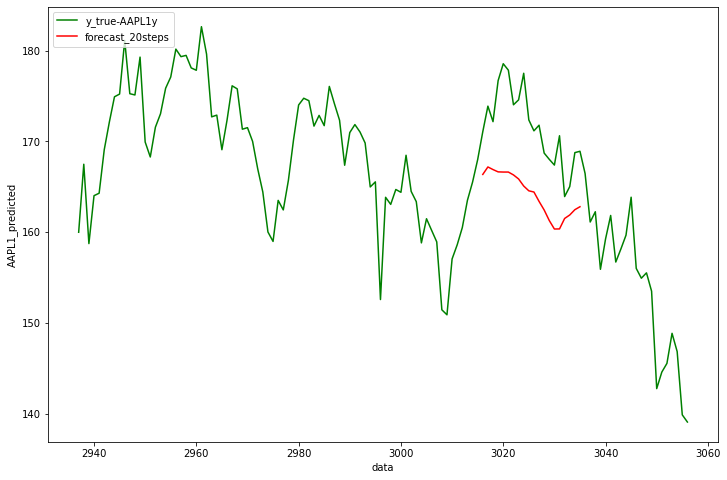

In [14]:
data_AAPL1y = data4feat_AAPL1.iloc[:,1:2]
data_true = data_AAPL1y[(tr_size1-n_stepsin):(tr_size1+n_stepsout)]
data_forecast = np.zeros((tr_size1+n_stepsout))
data_forecast[0:(tr_size1+n_stepsout)] = np.nan
data_forecast[(tr_size1- n_stepsout-1):(tr_size1-1)] = forcst[:,-1]

figtwo(12,8,data_true,data_forecast,'green','red','data','AAPL1_predicted',
       'y_true-AAPL1y','forecast_20steps')
